In [1]:
pip install yfinance pandas matplotlib scikit-learn


In [7]:
import yfinance as yf
import pandas as pd

# Download data for Apple from 2015 to 2024
ticker = "AAPL"
data = yf.download(ticker, start="2015-01-01", end="2024-12-31")

# Show first few rows
print(data.head())

# Save to CSV (optional)
data.to_csv("historical_data.csv")


/tmp/ipython-input-7-1883816720.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2015-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2015-01-02  24.288578  24.757332  23.848704  24.746224  212818400
2015-01-05  23.604332  24.137513  23.417720  24.057535  257142000
2015-01-06  23.606554  23.866479  23.244435  23.668758  263188400
2015-01-07  23.937571  24.037541  23.704304  23.815383  160423600
2015-01-08  24.857304  24.915065  24.148618  24.266363  237458000


In [8]:
# Load data
data = pd.read_csv("historical_data.csv", index_col="Date", parse_dates=True)

# Show basic info
print(data.info())
print(data.describe())

# Check for nulls
print(data.isnull().sum())

# Drop rows with missing values
data.dropna(inplace=True)


ValueError: 'Date' is not in list

In [9]:
import pandas as pd

# Load without index
df = pd.read_csv("historical_data.csv")
print(df.columns)
print(df.head())


Index(['Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
        Price               Close                High                 Low  \
0      Ticker                AAPL                AAPL                AAPL   
1        Date                 NaN                 NaN                 NaN   
2  2015-01-02  24.288578033447266  24.757332388307145  23.848703660119405   
3  2015-01-05  23.604331970214844  24.137512513705367  23.417719712206985   
4  2015-01-06   23.60655403137207  23.866478974309715  23.244434724352086   

                 Open     Volume  
0                AAPL       AAPL  
1                 NaN        NaN  
2   24.74622379044572  212818400  
3  24.057535347435078  257142000  
4   23.66875811738099  263188400  


In [10]:
data = pd.read_csv("historical_data.csv", index_col=0, parse_dates=True)
data.index.name = "Date"  # Optional: name the index for clarity
print(data.head())


                         Close                High                 Low  \
Date                                                                     
Ticker                    AAPL                AAPL                AAPL   
Date                       NaN                 NaN                 NaN   
2015-01-02  24.288578033447266  24.757332388307145  23.848703660119405   
2015-01-05  23.604331970214844  24.137512513705367  23.417719712206985   
2015-01-06   23.60655403137207  23.866478974309715  23.244434724352086   

                          Open     Volume  
Date                                       
Ticker                    AAPL       AAPL  
Date                       NaN        NaN  
2015-01-02   24.74622379044572  212818400  
2015-01-05  24.057535347435078  257142000  
2015-01-06   23.66875811738099  263188400  


/tmp/ipython-input-10-1717655345.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv("historical_data.csv", index_col=0, parse_dates=True)


In [12]:
import pandas as pd

# Load multi-level columns
raw_data = pd.read_csv("historical_data.csv", header=[0, 1], index_col=0, parse_dates=True)

# Flatten multi-level columns
raw_data.columns = [col[1] for col in raw_data.columns]  # Just keep the 'AAPL' level

# Reset index and rename if needed
raw_data.index.name = "Date"
data = raw_data.copy()

# Show what we have now
print(data.head())


                 AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2015-01-02  24.288578  24.757332  23.848704  24.746224  212818400
2015-01-05  23.604332  24.137513  23.417720  24.057535  257142000
2015-01-06  23.606554  23.866479  23.244435  23.668758  263188400
2015-01-07  23.937571  24.037541  23.704304  23.815383  160423600
2015-01-08  24.857304  24.915065  24.148618  24.266363  237458000


In [14]:
import pandas as pd

# Load the CSV with multi-level header (2 rows at the top), and set index as the first column (dates)
data = pd.read_csv("historical_data.csv", header=[0, 1], index_col=0, parse_dates=True)

# Flatten multi-level column names (keep only second level like 'Open', 'Close')
data.columns = data.columns.get_level_values(1)

# Make sure the index is named "Date"
data.index.name = "Date"

# Check the cleaned DataFrame
print(data.head())



Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2015-01-02  24.288578  24.757332  23.848704  24.746224  212818400
2015-01-05  23.604332  24.137513  23.417720  24.057535  257142000
2015-01-06  23.606554  23.866479  23.244435  23.668758  263188400
2015-01-07  23.937571  24.037541  23.704304  23.815383  160423600
2015-01-08  24.857304  24.915065  24.148618  24.266363  237458000


In [15]:
import pandas as pd

# Load the CSV with multi-level headers
data = pd.read_csv("historical_data.csv", header=[0, 1], index_col=0, parse_dates=True)

# Flatten the columns by keeping only the second level
data.columns = ['Open', 'High', 'Low', 'Close', 'Volume']  # Rename them manually

# Optional: if there's one more column (Adj Close), include it
# data.columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# Set index name for clarity
data.index.name = "Date"

# Confirm
print(data.head())


                 Open       High        Low      Close     Volume
Date                                                             
2015-01-02  24.288578  24.757332  23.848704  24.746224  212818400
2015-01-05  23.604332  24.137513  23.417720  24.057535  257142000
2015-01-06  23.606554  23.866479  23.244435  23.668758  263188400
2015-01-07  23.937571  24.037541  23.704304  23.815383  160423600
2015-01-08  24.857304  24.915065  24.148618  24.266363  237458000


In [16]:
# Create moving averages
data["SMA_5"] = data["Close"].rolling(window=5).mean()
data["SMA_10"] = data["Close"].rolling(window=10).mean()

# Prediction target: next day's closing price
data["Target"] = data["Close"].shift(-1)

# Drop any rows with NaN (from rolling or shifting)
data.dropna(inplace=True)

# Select features and label
features = ["Close", "SMA_5", "SMA_10"]
X = data[features]
y = data["Target"]


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split the data (no shuffling since it's time series)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
predictions = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 7.65


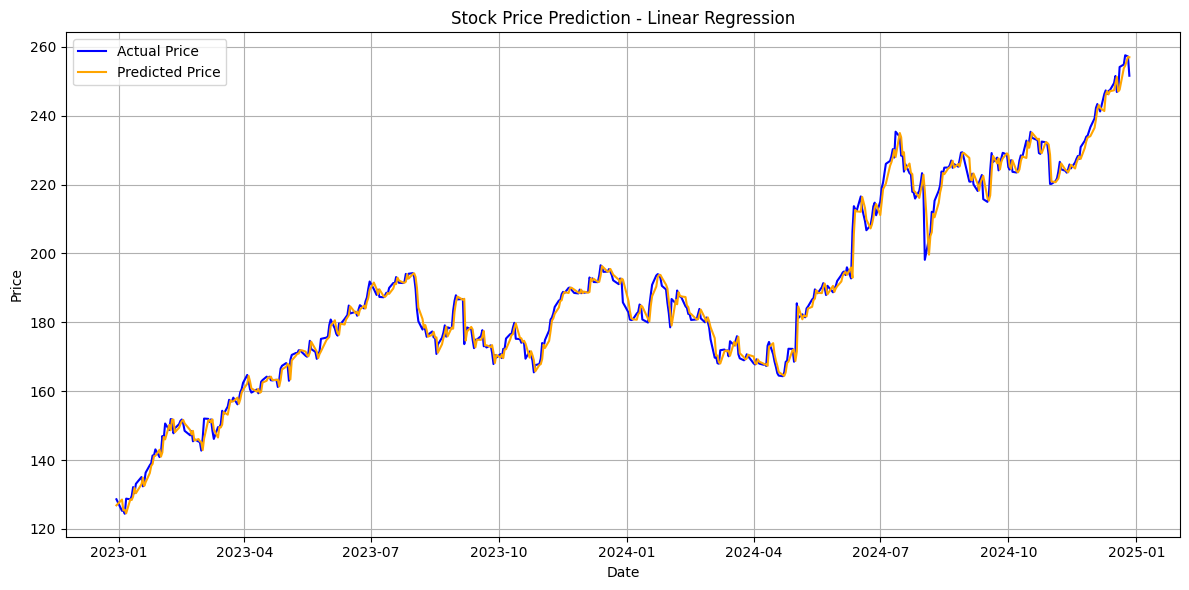

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label="Actual Price", color='blue')
plt.plot(y_test.index, predictions, label="Predicted Price", color='orange')
plt.title("Stock Price Prediction - Linear Regression")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [19]:
pip install tensorflow scikit-learn pandas numpy matplotlib


In [20]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# We'll use only the 'Close' price for now
close_data = data[["Close"]].values

# Scale data to [0,1]
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(close_data)

# Create sequences: 60 days to predict the next day
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i - window_size:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

window_size = 60
X, y = create_sequences(scaled_data, window_size)

# Reshape for LSTM (samples, timesteps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))


In [21]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 0.0214
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 0.0012
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0011
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0011
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 9.9104e-04
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0011
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 8.4471e-04
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 8.9687e-04
Epoch 9/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 7.5590e-04
Epoch 10/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0011


In [23]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step


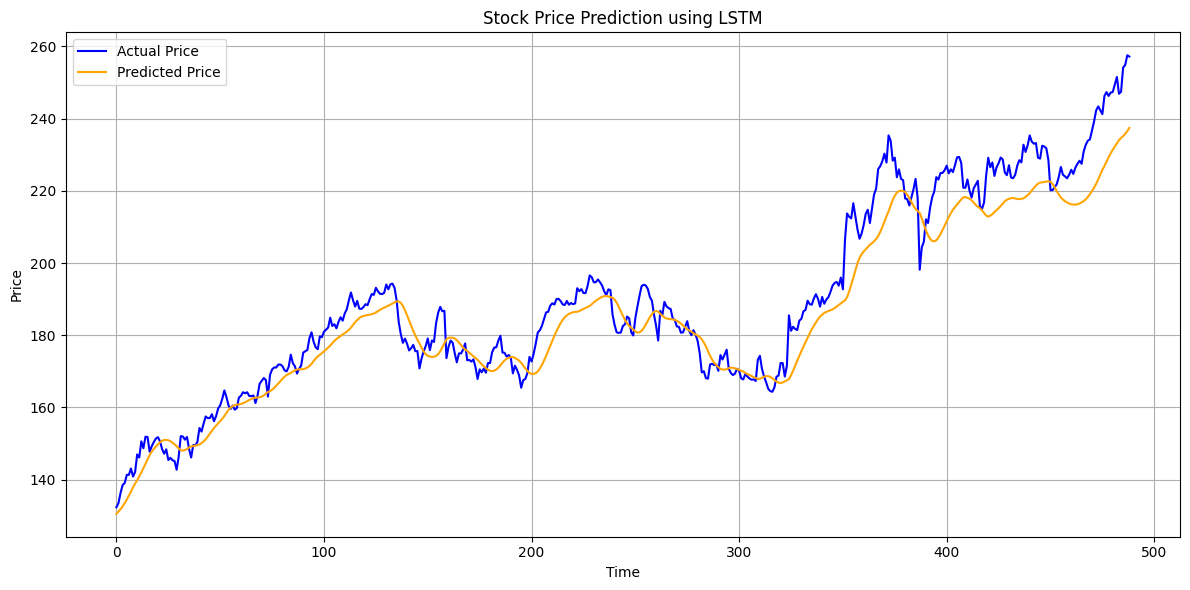

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_test_scaled, label="Actual Price", color='blue')
plt.plot(predictions, label="Predicted Price", color='orange')
plt.title("Stock Price Prediction using LSTM")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
